In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
deps = np.load('../img0_20/img0_c20_blur20_deps.npy')

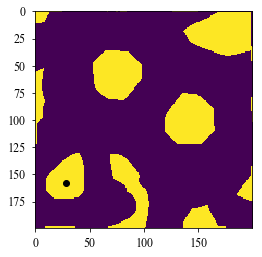

In [92]:
plt.figure()
plt.imshow(deps)
plt.plot([28],[158],'ko')
plt.show()

In [4]:
deps[140:175,10:50]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:
rows,cols = np.where(deps[140:175,10:50]==True)
print np.sum(rows)/np.count_nonzero(rows),np.count_nonzero(rows)
print np.sum(cols)/np.count_nonzero(cols),np.count_nonzero(cols)
print np.count_nonzero(rows)+np.count_nonzero(cols)

16 987
18 996
1983


In [6]:
#deps_cv2 = deps.view('uint8')#cv2.cvtColor(deps*255, cv2.COLOR_GRAY2BGR)#cv2.imread('../img0_20/img0_c20_blur20_deps.png',0)
im2,contours,hier = cv2.findContours(deps.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
im2.shape

(200, 200)

In [10]:
#plt.figure()
for sh in contours:
    print sh.shape
    print cv2.contourArea(sh)
    M = cv2.moments(sh)
    print int(M['m10']/M['m00']),int(M['m01']/M['m00'])
    print '\n'

(4, 1, 2)
27.0
22 198


(36, 1, 2)
442.5
151 191


(23, 1, 2)
190.0
194 163


(82, 1, 2)
1105.0
87 165


(29, 1, 2)
1067.5
28 154


(5, 1, 2)
12.5
198 86


(26, 1, 2)
1629.0
141 100


(28, 1, 2)
299.0
2 80


(28, 1, 2)
1563.5
74 58


(73, 1, 2)
1812.0
172 20


(4, 1, 2)
23.5
137 0


(12, 1, 2)
8.0
76 0


(15, 1, 2)
121.0
6 4




In [ ]:
print contours[4]

In [ ]:
#cv2.contourArea()
cv2.

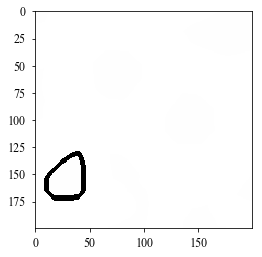

In [70]:
plt.figure()
plt.imshow(cv2.drawContours(im2,contours,4,100,thickness=3),cmap='Greys')
plt.show()

In [ ]:
#next, use points within to do fourier expansion
#still, how to get points within...

In [22]:
rows,cols = np.where(deps[140:175,10:50]==True)
rows += 140
cols += 10

In [23]:
len(rows),len(cols)
a= np.where(rows==154) 
b = np.where((cols==28))


In [24]:
r0 = np.sqrt(len(rows))

In [25]:
r0

31.749015732775089

In [26]:
ts = contours[4]
ts_m = cv2.moments(ts)
ts_cx = int(ts_m['m10']/ts_m['m00'])
ts_cy = int(ts_m['m01']/ts_m['m00'])
print ts_cx, ts_cy

28 154


In [53]:
thetas = np.zeros(len(rows))
for i,coord in enumerate(rows):
    point = (cols[i],coord)#.flatten()
    px = point[0]
    py = point[1]
    if (px == ts_cx) and (py == ts_cy):
        to_rem = i
        continue
    elif px != ts_cx:
        theta =  np.arctan(float((py-ts_cy))/(px-ts_cx))
    else:
        if py - ts_cy > 0:
            theta = np.pi/2
        elif py - ts_cy < 0:
            theta = -np.pi/2
    if (px == ts_cx) and (py == ts_cy):
            print 'here'
    thetas[i] = theta
thetas = np.delete(thetas,to_rem)

In [55]:
def a_n(n,angles):
    n = float(n)
    return np.sum(np.sin(n*angles))/len(angles)

def b_n(n,angles):
    n = float(n)
    return np.sum(np.cos(n*angles))/len(angles)

In [56]:
a2 = a_n(2,thetas)
print a2
b2 = b_n(2,thetas)
print b2
S2 = np.sqrt(a2**2+b2**2)
print S2
a3 = a_n(3,thetas)
print a3
b3 = b_n(3,thetas)
print b3
S3 = np.sqrt(a3**2+b3**2)
print S3

-0.0795062771403
0.0120830587649
0.0804192042601
-0.06851680666
-0.230805168581
0.240760417508


In [81]:
print a_n(0,thetas),b_n(0,thetas)
a1 =  a_n(1,thetas)
b1 = b_n(1,thetas)
print a1, b1

0.0 1.0
-0.051151490513 0.645525515862


In [58]:
thetas*180/np.pi

array([ 70.34617594,  74.0546041 ,  77.90524292, ...,  74.475889  ,
        71.56505118,  68.74949449])

In [59]:
print ts[0:9].flatten()
print ts[9:12].flatten()
print ts[12:17].flatten()
print ts[17:20].flatten()

[ 37 131  36 132  34 132  33 133  32 133  30 135  29 135  26 138  25 138]
[ 11 152  11 153  10 154]
[ 10 165  17 172  35 172  36 171  39 171]
[ 43 167  43 166  44 165]


In [60]:
print ts_cx,ts_cy

28 154


In [67]:
def boundary_theta(angle,r0,a_n,b_n):
    temp = 0
    for n,a_val in enumerate(a_n):
        temp += a_val*np.sin((n+1)*angle) + b_n[n]*np.cos((n+1)*angle)
    return r0*(1 + temp)

In [88]:
alist = [0,a2,a3]
blist = [0,b2,b3]

In [89]:
pts = np.linspace(0,360,1000)*np.pi/180
r_vals = []
for ts in pts:
    r_val = boundary_theta(ts,r0,alist,blist)
    r_vals.append(r_val)

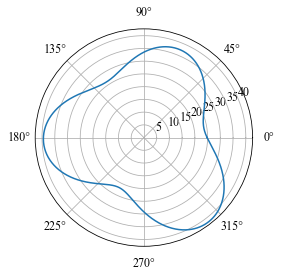

In [90]:
plt.subplot(projection='polar')
plt.plot(pts,r_vals)
plt.show()